<a href="https://colab.research.google.com/github/thesamasaurus/kaldheim-ml-bot/blob/main/kaldheim_ml_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import re
import pandas as pd
import copy
import numpy as np
import pickle
import random
import tensorflow as tf
import json
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.metrics import categorical_crossentropy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import KFold

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
g = open("/content/gdrive/MyDrive/Colab Notebooks/17_lands_scrapes/kaldheim/master_hash", "rb")
master_hash = pickle.load(g)

In [ ]:
f = open("/content/gdrive/MyDrive/Colab Notebooks/17_lands_scrapes/kaldheim/pack_list_testrun", "rb")
pack_list = pickle.load(f)

In [ ]:
d = open("/content/gdrive/MyDrive/Colab Notebooks/17_lands_scrapes/kaldheim/pick_list_testrun", "rb")
pick_list = pickle.load(d)

In [ ]:
h = open("/content/gdrive/MyDrive/Colab Notebooks/17_lands_scrapes/kaldheim/pool_list_testrun", "rb")
pool_list = pickle.load(h)

In [ ]:
j = open("/content/gdrive/MyDrive/Colab Notebooks/17_lands_scrapes/kaldheim/feature_vector_list_testrun", "rb")
feature_vector_list = pickle.load(j)

In [ ]:
pool_list[35002]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
feature_vector_list[35002]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [ ]:
len(pick_list[18000])

305

In [ ]:
def concatenate_pool_pack(pools, packs):
  temp_list = []
  for i in range(len(pool_list)):
    temp = np.concatenate((pools[i], packs[i], feature_vector_list[i]))
    temp_list.append(temp)
  numpy_poolpick_array = np.asarray(temp_list)
  return numpy_poolpick_array

In [ ]:
x_vals = concatenate_pool_pack(pool_list, pack_list)
y_vals = np.asarray(pick_list)
x_vals.shape, y_vals.shape

((44376, 624), (44376, 305))

In [ ]:
# num_folds = 10
# acc_per_fold = []
# loss_per_fold = []
# fold_no = 1
# kfold = KFold(n_splits=num_folds, shuffle=True)
# for train, test in kfold.split(x_vals, y_vals):

#   model = Sequential([
#       Dropout(0.3, input_shape=(624,)),
#       Dense(units=2000, input_shape=(648,), activation="relu"),
#       Dense(units=2000, activation="relu"),
#       Dense(units=2000, activation="relu"),
#       Dense(units=305, activation="softmax"),
#   ])
#   # model = keras.models.load_model("/content/gdrive/MyDrive/Colab Notebooks/17_lands_scrapes/kaldheim/model_save_1")
#   # Compile the model
#   model.compile(optimizer=Adam(learning_rate=0.00002), loss="categorical_crossentropy", metrics=["categorical_accuracy"])

#   # Generate a print
#   print('------------------------------------------------------------------------')
#   print(f'Training for fold {fold_no} ...')

#   for i in range(0, 20):
#     # Fit data to model
#     model.compile(optimizer=Adam(learning_rate=0.00002), loss="categorical_crossentropy", metrics=["categorical_accuracy"])
#     history = model.fit(x_vals[train], y_vals[train], epochs=1, verbose=1, batch_size = 16, shuffle=True)

#     # Generate generalization metrics
#     temp_scores = model.evaluate(x_vals[test], y_vals[test], verbose=0)
#     print("test_error = ", temp_scores[1], "loop:", i)

#   for i in range(0, 2):
#     # Fit data to model
#     model.compile(optimizer=Adam(learning_rate=0.000002), loss="categorical_crossentropy", metrics=["categorical_accuracy"])
#     history = model.fit(x_vals[train], y_vals[train], epochs=1, verbose=1, batch_size = 16, shuffle=True)

#     # Generate generalization metrics
#     temp_scores = model.evaluate(x_vals[test], y_vals[test], verbose=0)
#     print("test_error = ", temp_scores[1], "loop:", i)

#   for i in range(0, 2):
#     # Fit data to model
#     model.compile(optimizer=Adam(learning_rate=0.0000003), loss="categorical_crossentropy", metrics=["categorical_accuracy"])
#     history = model.fit(x_vals[train], y_vals[train], epochs=1, verbose=1, batch_size = 16, shuffle=True)

#     # Generate generalization metrics
#     temp_scores = model.evaluate(x_vals[test], y_vals[test], verbose=0)
#     print("test_error = ", temp_scores[1], "loop:", i)

#   scores = model.evaluate(x_vals[test], y_vals[test], verbose=0)
#   print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
#   acc_per_fold.append(scores[1] * 100)
#   loss_per_fold.append(scores[0])

#   # Increase fold number
#   fold_no = fold_no + 1

In [ ]:
# # == Provide average scores ==
# print('------------------------------------------------------------------------')
# print('Score per fold')
# for i in range(0, len(acc_per_fold)):
#   print('------------------------------------------------------------------------')
#   print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
# print('------------------------------------------------------------------------')
# print('Average scores for all folds:')
# print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
# print(f'> Loss: {np.mean(loss_per_fold)}')
# print('------------------------------------------------------------------------')

In [ ]:
model = Sequential([
    Dropout(0.25, input_shape=(624,)),
    Dense(units=2000, activation="relu"),
    Dense(units=2000, activation="relu"),
    Dense(units=2000, activation="relu"),
    Dense(units=305, activation="softmax"),
])

In [ ]:
# model = Sequential([
#     Dropout(0.25, input_shape=(636,)),
#     Dense(units=2000, input_shape=(648,), activation="relu"),
#     Dense(units=2000, activation="relu"),
#     Dense(units=2000, activation="relu"),
#     Dense(units=311, activation="softmax"),
# ])
# model = keras.models.load_model("/content/gdrive/MyDrive/Colab Notebooks/17_lands_scrapes/kaldheim/model_save_2")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 624)               0         
_________________________________________________________________
dense (Dense)                (None, 2000)              1250000   
_________________________________________________________________
dense_1 (Dense)              (None, 2000)              4002000   
_________________________________________________________________
dense_2 (Dense)              (None, 2000)              4002000   
_________________________________________________________________
dense_3 (Dense)              (None, 305)               610305    
Total params: 9,864,305
Trainable params: 9,864,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
len(y_vals), len(x_vals)

(44376, 44376)

In [ ]:
num_test_drafts = 100   #change value here to use a different number of test drafts

num_test_picks = num_test_drafts * 44
slice_index = len(x_vals) - num_test_picks
print(slice_index)

39976


In [ ]:
x_train = x_vals[:slice_index]
x_test = x_vals[slice_index:-1]
y_train = y_vals[:slice_index]
y_test = y_vals[slice_index:-1]
len(x_train), len(x_test)

(39976, 4399)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.00002), loss="categorical_crossentropy", metrics=["categorical_accuracy"])

In [ ]:
# model.fit(x_train, y_train,  batch_size=64, epochs=22, verbose=1, shuffle=True)

In [ ]:
model = Sequential([
    Dropout(0.3, input_shape=(624,)),
    Dense(units=2000, activation="relu"),
    Dense(units=2000, activation="relu"),
    Dense(units=2000, activation="relu"),
    Dense(units=2000, activation="relu"),
    Dense(units=305, activation="softmax"),
])

epochs = 35
for i in range(epochs):
  model.compile(optimizer=Adam(learning_rate=0.00002), loss="categorical_crossentropy", metrics=["categorical_accuracy"])
  model.fit(x_train, y_train,  batch_size=64, epochs=1, verbose=1, shuffle=True)
  score=model.evaluate(x_test, y_test, verbose=2)
  print("learning rate 1, epoch: ", i+1 , " dev categorical accuracy: ", score[1])
epochs = 10
for l in range(epochs):
  model.compile(optimizer=Adam(learning_rate=0.00001), loss="categorical_crossentropy", metrics=["categorical_accuracy"])
  model.fit(x_train, y_train,  batch_size=64, epochs=1, verbose=1, shuffle=True)
  score=model.evaluate(x_test, y_test, verbose=2)
  print("learning rate 2, epoch: ", l+1 , " dev categorical accuracy: ", score[1])
epochs_2 = 5
for j in range(epochs_2):
  model.compile(optimizer=Adam(learning_rate=0.000002), loss="categorical_crossentropy", metrics=["categorical_accuracy"])
  model.fit(x_train, y_train,  batch_size=64, epochs=1, verbose=1, shuffle=True)
  score=model.evaluate(x_test, y_test, verbose=2)
  print("learning rate 3, epoch: ", j+1 , " dev categorical accuracy: ", score[1])
epochs_3 = 3
for k in range(epochs_3):
  model.compile(optimizer=Adam(learning_rate=0.0000002), loss="categorical_crossentropy", metrics=["categorical_accuracy"])
  model.fit(x_train, y_train,  batch_size=64, epochs=1, verbose=1, shuffle=True)
  score=model.evaluate(x_test, y_test, verbose=2)
  print("learning rate 4, epoch: ", k+1 , " dev categorical accuracy: ", score[1])

625/625 [==============================] - 4s 6ms/step - loss: 5.4339 - categorical_accuracy: 0.0183
138/138 - 0s - loss: 5.1684 - categorical_accuracy: 0.0475
learning rate 1, epoch:  1  dev categorical accuracy:  0.04751079902052879
625/625 [==============================] - 4s 5ms/step - loss: 5.1345 - categorical_accuracy: 0.0392
138/138 - 0s - loss: 5.0229 - categorical_accuracy: 0.0627
learning rate 1, epoch:  2  dev categorical accuracy:  0.06274153292179108
625/625 [==============================] - 4s 6ms/step - loss: 4.9789 - categorical_accuracy: 0.0518
138/138 - 0s - loss: 4.8550 - categorical_accuracy: 0.0923
learning rate 1, epoch:  3  dev categorical accuracy:  0.09229370206594467
625/625 [==============================] - 4s 6ms/step - loss: 4.7890 - categorical_accuracy: 0.0935
138/138 - 0s - loss: 4.5896 - categorical_accuracy: 0.1637
learning rate 1, epoch:  4  dev categorical accuracy:  0.16367356479167938
625/625 [==============================] - 4s 6ms/step - los

In [ ]:
score=model.evaluate(x_test, y_test, verbose=2)
print(score)

138/138 - 0s - loss: 1.8912 - categorical_accuracy: 0.6045
[1.891185998916626, 0.6044555306434631]


In [ ]:
model = keras.models.load_model("/content/gdrive/MyDrive/Colab Notebooks/17_lands_scrapes/kaldheim/model_save_2")

In [ ]:
# model.save("/content/gdrive/MyDrive/Colab Notebooks/17_lands_scrapes/kaldheim/model_save_2")

### View Predictions

In [ ]:
output_dict = {}

In [ ]:
def find_contense(one_hot):
    cards = []
    for i in range(0, len(one_hot)):
      # print(one_hot[i])
      if (one_hot[i] == 0):
          pass
      if (one_hot[i] == 1):
          cards.append(master_hash["index_to_name"][i])
      else:
        for j in range(one_hot[i].astype(int)):
          cards.append(master_hash["index_to_name"][i])
    return cards

In [ ]:
def generate_prediction(index, predictions_array):
  pick = find_contense(y_test[index])
  pool = find_contense(x_test[index][:305])
  pack_onehot = x_test[index][305:610]
  pack = find_contense(x_test[index][305:610])
  running_pred = predictions_array[index]
  pick_vals = np.multiply(pack_onehot, running_pred)

  pred = master_hash["index_to_name"][np.argmax(running_pred)]
  return pick, pool, pack, pred, pick_vals

In [ ]:
# def error_correction(error):
#   new_error = -error*error + 1
#   return new_error
# error_correction(0.5)

0.75

In [ ]:
def error_correction(error):
  new_error = -np.log(error)
  return new_error
error_correction(0.00002)

10.819778284410283

In [ ]:
def compare_picks(pick_num, card_name):

  ai_pick_val = max(output_dict["vals_" + str(pick_num)], key=lambda item:item[1])[1]

  human_pick_val = 0

  for i in range(len(output_dict["vals_" + str(pick_num)])):

    if "relative_vals_" + str(pick_num) not in output_dict:
      output_dict["relative_vals_" + str(pick_num)] = []

    output_dict["relative_vals_" + str(pick_num)].append(( output_dict["vals_" + str(pick_num)][i][0], error_correction(1 - (output_dict["vals_" + str(pick_num)][i][1] / ai_pick_val))))

    if (output_dict["vals_" + str(pick_num)][i][0] == card_name[0]):
      human_pick_val = output_dict["vals_" + str(pick_num)][i][1]
    
  relative_value = error_correction(1 - (human_pick_val / ai_pick_val))


  return relative_value

In [ ]:
def generate_all_preds(x_test, y_test):
  predictions_array = model.predict(x_test)
  for i in range(len(x_test)):
    pick, pool, pack, pred, vals = generate_prediction(i, predictions_array)
    list_of_tuples = []
    for j in range(len(vals)):
      if (vals[j] > 0):  
        list_of_tuples.append(( master_hash["index_to_name"][j], vals[j]))
    output_dict["vals_" + str(i)] = list_of_tuples 
    output_dict["pick_" + str(i)] = pick
    output_dict["pack_" + str(i)] = pack
    output_dict["pool_" + str(i)] = pool
    output_dict["pred_" + str(i)] = pred

    output_dict["pick_val_" + str(i)] = compare_picks(i, output_dict["pick_" + str(i)])

  return output_dict

In [ ]:
output_dict = generate_all_preds(x_test, y_test)  #this cell may take awhile to run

In [ ]:
output_dict["relative_vals_244"]

[('Berg Strider', 0.31127856005751564),
 ('Craven Hulk', 0.005644994152470217),
 ('Elderfang Disciple', 0.18362377496317217),
 ('Feed the Serpent', 1.0),
 ('Funeral Longboat', 5.004139497910565e-05),
 ('Goldvein Pick', 0.18961607944649428),
 ('Great Hall of Starnheim', 0.045404463242670556),
 ('Icebind Pillar', 0.9996986003293067),
 ('Iron Verdict', 0.002231056884936633),
 ('Karfell Harbinger', 0.0002418459922306493),
 ('Karfell Kennel-Master', 0.012265351885277553),
 ('Mystic Reflection', 0.003289699712722194),
 ('Rune of Mortality', 0.1358360128255609),
 ('Snow-Covered Forest', 0.13089043257340638),
 ('Struggle for Skemfar', 0.9719833851685138)]

In [ ]:
def display_cards(pack):
    array_of_images = []
    if (isinstance(pack, str)):
      card_name = pack.replace("/", "")
      array_of_images.append(mpimg.imread('/content/gdrive/MyDrive/Colab Notebooks/17_lands_scrapes/kaldheim/card_images/' + card_name + ".jpg"))
    else:
      for card in pack:
        card_name = card.replace("/", "")
        array_of_images.append(mpimg.imread('/content/gdrive/MyDrive/Colab Notebooks/17_lands_scrapes/kaldheim/card_images/' + card_name + ".jpg"))
    fig = plt.figure(figsize=(40, 15))
    for i in range(len(array_of_images)):
        b = array_of_images[i]
        fig.add_subplot(3, 15, i+1)
        plt.imshow(b)
        plt.axis("off")
    plt.show()
    return

In [ ]:
def display_all(index):
  print("pack"), display_cards(output_dict["pack_" + str(index)]), print("pred"), display_cards(output_dict["pred_" + str(index)]), print("pick") , print("score: " + str(output_dict["pick_val_" +str(index)])),  display_cards(output_dict["pick_" + str(index)]), print("pool"),display_cards(output_dict["pool_" + str(index)]) 

In [ ]:
output_dict["pred_44"]

'Fynn, the Fangbearer'

pack


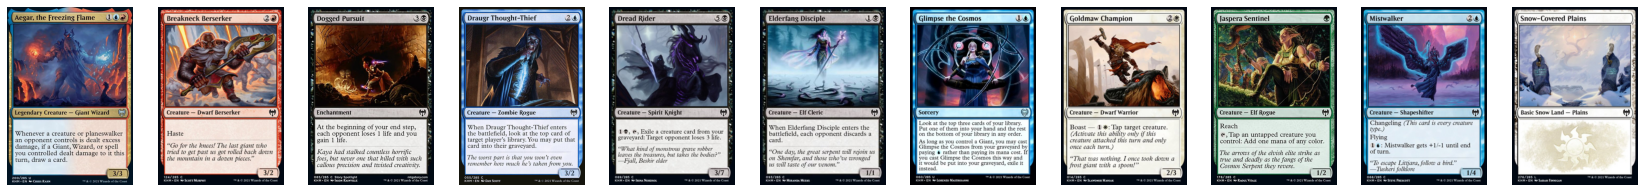

pred


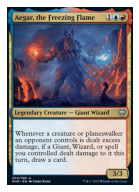

pick
score: 0.22353847758908696


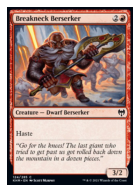

pool


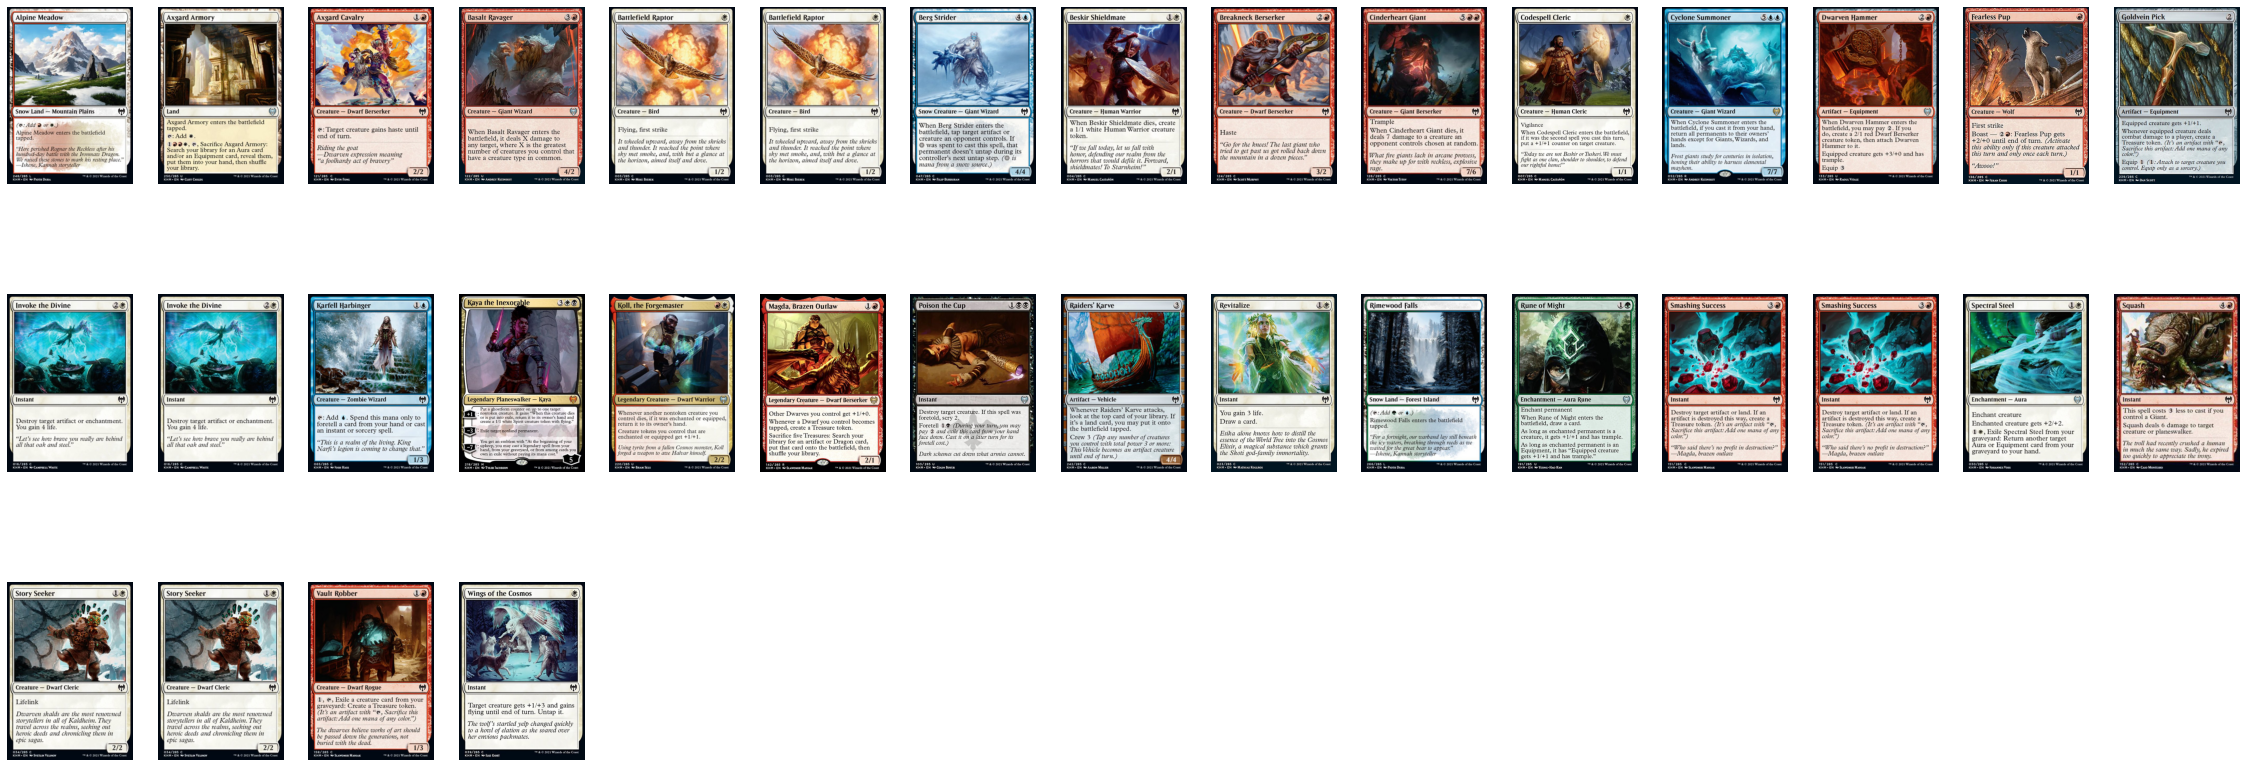

In [ ]:
display_all(134)

In [ ]:
# with open("/content/gdrive/MyDrive/Colab Notebooks/17_lands_scrapes/kaldheim/output_dict.txt", "w") as outfile:
#   json.dump(output_dict, outfile)
